In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import random
import math
import time
from numpy.random import seed
from numpy.random import randint
import heapq

In [2]:
class Graph:
    def __init__(self, num_vertices, num_edges):
        self.num_vertices = num_vertices
        self.adj_list = [[] for _ in range(num_vertices)]

        # Fixed number of edges based on (num_vertices * num_vertices) // 4
        for _ in range(num_edges):
            index = random.randint(0, num_vertices - 1)
            vertice = random.randint(0, num_vertices - 1)
            while index == vertice:
                vertice = random.randint(0, num_vertices - 1)
            weight = random.randint(1, 10)
            self.adj_list[index].append((vertice, weight))

def dijkstra(graph, start):
    distance = [np.inf for i in range(graph.num_vertices)]
    distance[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        edges, vertex = heapq.heappop(priority_queue)
        if edges > distance[vertex]:
            continue
        for i, j in graph.adj_list[vertex]:
            if distance[i] > distance[vertex] + j:
                distance[i] = distance[vertex] + j
                heapq.heappush(priority_queue, (distance[i], i))



    return distance
# Test Input
num_vertices = 5
num_edges = 7
start_vertex = 0
test_graph = Graph(num_vertices, num_edges)

"""# Test Output
distances = dijkstra(test_graph, start_vertex)
predecessors = [-1 if d == np.inf else None for d in distances]
for vertex, distance, predecessor in zip(range(num_vertices), distances, predecessors):
    print(f"Distance from {start_vertex} to {vertex}: {distance}")
    print(f"Predecessor of {vertex}: {predecessor}")"""

distances = dijkstra(test_graph, start_vertex)

# Compute predecessors
predecessors = [-1 if distances[i] == np.inf else start_vertex for i in range(num_vertices)]
for vertex, neighbors in enumerate(test_graph.adj_list):
    for neighbor, weight in neighbors:
        if distances[neighbor] > distances[vertex] + weight:
            distances[neighbor] = distances[vertex] + weight
            predecessors[neighbor] = vertex

# Output distances and predecessors
print("Distances:", distances)
print("Predecessors:", predecessors)

Distances: [0, inf, 6, inf, inf]
Predecessors: [0, -1, 0, -1, -1]


### fixed edge

Number of vertices: 100, Execution time: 0.000013 seconds
Number of vertices: 1100, Execution time: 0.000063 seconds
Number of vertices: 2100, Execution time: 0.000119 seconds
Number of vertices: 3100, Execution time: 0.000174 seconds
Number of vertices: 4100, Execution time: 0.000240 seconds
Number of vertices: 5100, Execution time: 0.000290 seconds
Number of vertices: 6100, Execution time: 0.000354 seconds
Number of vertices: 7100, Execution time: 0.000422 seconds
Number of vertices: 8100, Execution time: 0.000472 seconds
Number of vertices: 9100, Execution time: 0.000784 seconds
Number of vertices: 10100, Execution time: 0.000563 seconds
Number of vertices: 11100, Execution time: 0.000611 seconds
Number of vertices: 12100, Execution time: 0.000717 seconds
Number of vertices: 13100, Execution time: 0.000719 seconds
Number of vertices: 14100, Execution time: 0.000773 seconds
Number of vertices: 15100, Execution time: 0.001013 seconds


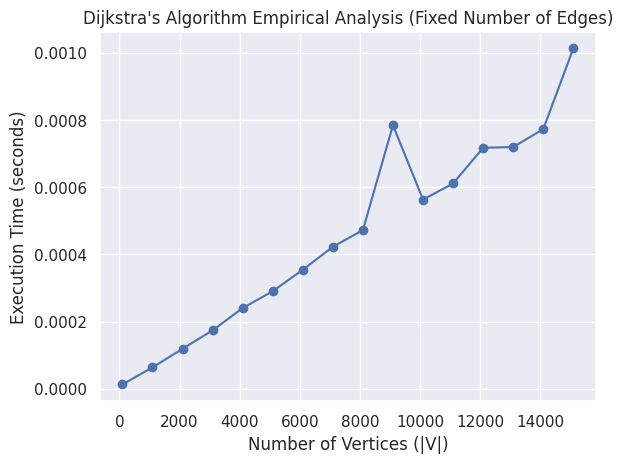

In [3]:
# Empirical analysis
if __name__ == "__main__":
    num_vertices_list = [i for i in range(100,16000,1000)]  # Varying number of vertices
    fixed_num_edges = 100
    execution_times = []
    vertice_no = []

    for num_vertices in num_vertices_list:
        vertice_no.append(num_vertices)
        graph = Graph(num_vertices, fixed_num_edges)

        start_time = time.time()
        distances = dijkstra(graph, 0)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        print(f"Number of vertices: {num_vertices}, Execution time: {execution_time:.6f} seconds")
        df_vadj = {'num of vertice': vertice_no, 'time': execution_time}
    df_vadj = pd.DataFrame(df_vadj)

    # Plotting the results
    import matplotlib.pyplot as plt

    plt.plot(num_vertices_list, execution_times, marker='o')
    plt.xlabel("Number of Vertices (|V|)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra's Algorithm Empirical Analysis (Fixed Number of Edges)")
    plt.show()

In [4]:
df_vadj

,num of vertice,time
0,100,0.001013
1,1100,0.001013
2,2100,0.001013
3,3100,0.001013
4,4100,0.001013
5,5100,0.001013
6,6100,0.001013
7,7100,0.001013
8,8100,0.001013
9,9100,0.001013


### fixed vertice

Number of edges: 1, Execution time: 0.000035 seconds
Number of edges: 5001, Execution time: 0.001948 seconds
Number of edges: 10001, Execution time: 0.001778 seconds
Number of edges: 15001, Execution time: 0.002334 seconds
Number of edges: 20001, Execution time: 0.002721 seconds
Number of edges: 25001, Execution time: 0.003480 seconds
Number of edges: 30001, Execution time: 0.004892 seconds
Number of edges: 35001, Execution time: 0.004164 seconds
Number of edges: 40001, Execution time: 0.005767 seconds
Number of edges: 45001, Execution time: 0.006594 seconds
Number of edges: 50001, Execution time: 0.009633 seconds
Number of edges: 55001, Execution time: 0.009266 seconds
Number of edges: 60001, Execution time: 0.008867 seconds
Number of edges: 65001, Execution time: 0.009967 seconds
Number of edges: 70001, Execution time: 0.010355 seconds
Number of edges: 75001, Execution time: 0.012726 seconds
Number of edges: 80001, Execution time: 0.020111 seconds
Number of edges: 85001, Execution ti

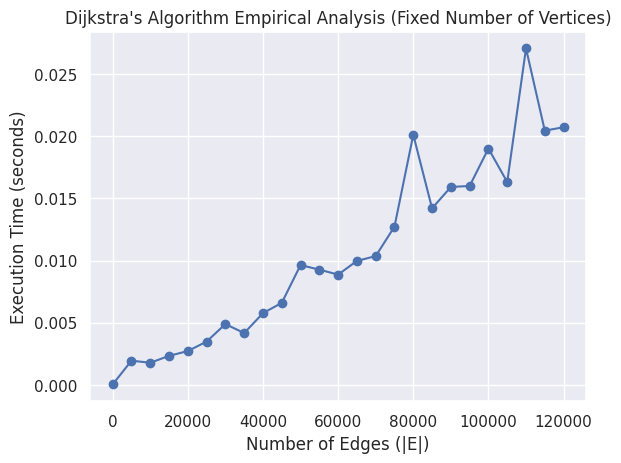

In [8]:
# Empirical analysis
if __name__ == "__main__":
    num_vertices = 500
    edge_counts = [i for i in range(1,math.comb(num_vertices,2),5000)]
    execution_times = []
    edge_no = []

    for num_edges in edge_counts:
        edge_no.append(num_edges)
        graph = Graph(num_vertices, num_edges)

        start_time = time.time()
        distances = dijkstra(graph, 0)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        print(f"Number of edges: {num_edges}, Execution time: {execution_time:.6f} seconds")
        df_adj = {'num of edge': edge_no,'time':execution_times}
    df_adj = pd.DataFrame(df_adj)


    plt.plot(edge_counts, execution_times, marker='o')
    plt.xlabel("Number of Edges (|E|)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra's Algorithm Empirical Analysis (Fixed Number of Vertices)")
    plt.show()

In [9]:
df_adj

,num of edge,time
0,1,0.000035
1,5001,0.001948
2,10001,0.001778
3,15001,0.002334
4,20001,0.002721
5,25001,0.003480
6,30001,0.004892
7,35001,0.004164
8,40001,0.005767
9,45001,0.006594


## adjacency matrix

In [10]:
import sys

def custom_key(elements):
    return elements[1]
def sorting(L1,L2):


    final=[]
    L3 =[]
    for i in range(len(L1)):
        L3.append(L2[L1[i]])
    L = list(zip(L1,L3))
    L = sorted(L,key =custom_key)
    for i in range(len(L1)):
      final.append(L[i][0])
    return final
def dijkstra(adj,src):
    Q=[]

    S=[0]*len(adj)
    for i in range(len(adj)):
        Q.append(i)
    d = [float('inf')]*len(adj)
    pi = [None]*len(adj)
    d[src] = 0
    pi[src]=-1
    Q = sorting(Q,d)
    while (Q!=[]):
        flag=0
        curr = Q[0]
        S[curr]=1
        Q.pop(0)
        for i in range(len(adj)):
            if (adj[curr][i]>0 and S[i]!=1 and d[i]>d[curr]+adj[curr][i]):
                d[i] = d[curr]+adj[curr][i]
                pi[i] =curr
                flag=1
        if (flag==1):
          Q= sorting(Q,d)
    return d,pi


# Example adjacency matrix representing a weighted directed graph
adjacency_matrix = [[ 0, 4, 0, 0, 0, 0, 0, 8, 0 ],
                        [4, 0, 8, 0, 0, 0, 0, 11, 0 ],
                        [ 0, 8, 0, 7, 0, 4, 0, 0, 2 ],
                        [0, 0, 7, 0, 9, 14, 0, 0, 0 ],
                        [ 0, 0, 0, 9, 0, 10, 0, 0, 0 ],
                        [ 0, 0, 4, 14, 10, 0, 2, 0, 0 ],
                        [ 0, 0, 0, 0, 0, 2, 0, 1, 6 ],
                        [8, 11, 0, 0, 0, 0, 1, 0, 7 ],
                        [ 0, 0, 2, 0, 0, 0, 6, 7, 0 ] ]




# Source vertex
source_vertex = 0

distances, predecessors = dijkstra(adjacency_matrix, source_vertex)

# Print the result, which includes distances and predecessors
print("Distances:", distances)
print("Predecessors:", predecessors)



Distances: [0, 4, 12, 19, 21, 11, 9, 8, 14]
Predecessors: [-1, 0, 1, 2, 5, 6, 7, 0, 2]


Number of edges: 1, Execution time: 0.016037 seconds
Number of edges: 5001, Execution time: 0.042260 seconds
Number of edges: 10001, Execution time: 0.039236 seconds
Number of edges: 15001, Execution time: 0.039844 seconds
Number of edges: 20001, Execution time: 0.040097 seconds
Number of edges: 25001, Execution time: 0.043006 seconds
Number of edges: 30001, Execution time: 0.042515 seconds
Number of edges: 35001, Execution time: 0.039387 seconds
Number of edges: 40001, Execution time: 0.040766 seconds
Number of edges: 45001, Execution time: 0.039203 seconds
Number of edges: 50001, Execution time: 0.040021 seconds
Number of edges: 55001, Execution time: 0.040304 seconds
Number of edges: 60001, Execution time: 0.060657 seconds
Number of edges: 65001, Execution time: 0.041544 seconds
Number of edges: 70001, Execution time: 0.043827 seconds
Number of edges: 75001, Execution time: 0.043438 seconds
Number of edges: 80001, Execution time: 0.041348 seconds
Number of edges: 85001, Execution ti

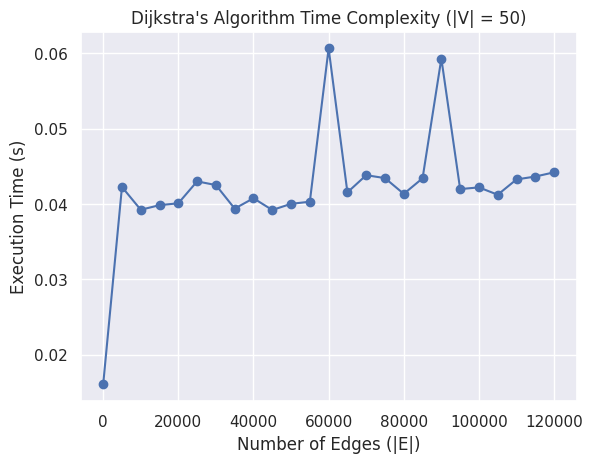

In [19]:
import sys
import time
import random
import matplotlib.pyplot as plt



# Function to generate a random graph with a specified number of vertices and edges
def generate_random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    edges_generated = 0
    while edges_generated < num_edges:
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        if u != v and adjacency_matrix[u][v] == 0:
            weight = random.randint(1, 100)  # Random edge weight
            adjacency_matrix[u][v] = weight
            edges_generated += 1
    return adjacency_matrix

# Specify the number of vertices (|V|) and vary the number of edges (|E|)
num_vertices = 500  # Constant number of vertices
edge_counts = [i for i in range(1,math.comb(num_vertices,2),5000)]  # Vary the number of edges
execution_times = []
edge_no = []

for num_edges in edge_counts:
    edge_no.append(num_edges)
    adjacency_matrix = generate_random_graph(num_vertices, num_edges)

    start_time = time.time()
    distances, predecessors = dijkstra(adjacency_matrix, 0)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)
    print(f"Number of edges: {num_edges}, Execution time: {execution_time:.6f} seconds")

    df_mat = {'num of edge': edge_no,'time':execution_times}
df_mat = pd.DataFrame(df_mat)

# Plot the results
plt.plot(edge_counts, execution_times, marker='o')
plt.xlabel('Number of Edges (|E|)')
plt.ylabel('Execution Time (s)')
plt.title('Dijkstra\'s Algorithm Time Complexity (|V| = 50)')
plt.grid(True)
plt.show()


In [20]:
df_mat

,num of edge,time
0,1,0.016037
1,5001,0.042260
2,10001,0.039236
3,15001,0.039844
4,20001,0.040097
5,25001,0.043006
6,30001,0.042515
7,35001,0.039387
8,40001,0.040766
9,45001,0.039203


Number of vertices: 100, Execution time: 0.000681 seconds
Number of vertices: 1100, Execution time: 0.072479 seconds
Number of vertices: 2100, Execution time: 0.277790 seconds
Number of vertices: 3100, Execution time: 0.590896 seconds
Number of vertices: 4100, Execution time: 1.069819 seconds
Number of vertices: 5100, Execution time: 1.534265 seconds
Number of vertices: 6100, Execution time: 2.331430 seconds
Number of vertices: 7100, Execution time: 3.176821 seconds
Number of vertices: 8100, Execution time: 4.006674 seconds
Number of vertices: 9100, Execution time: 5.426500 seconds
Number of vertices: 10100, Execution time: 6.877383 seconds
Number of vertices: 11100, Execution time: 9.779649 seconds
Number of vertices: 12100, Execution time: 9.044285 seconds
Number of vertices: 13100, Execution time: 10.909625 seconds
Number of vertices: 14100, Execution time: 12.456806 seconds
Number of vertices: 15100, Execution time: 14.988404 seconds


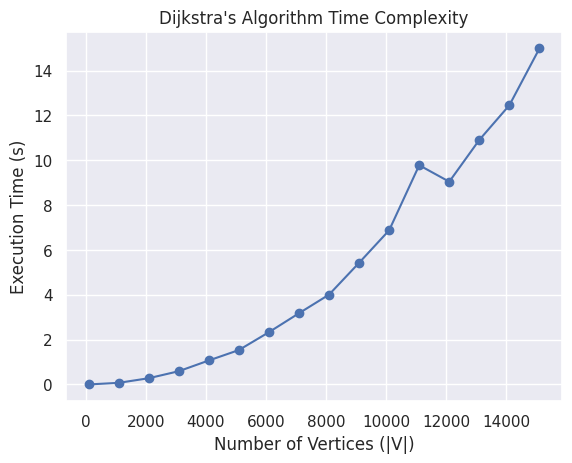

In [21]:
def generate_random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    for u in range(1,num_vertices):
        v=u-1
        if u != v:
            weight = random.randint(1, 100)  # Random edge weight
            adjacency_matrix[u][v] = weight

    return adjacency_matrix

# Measure execution time for different graph sizes
graph_sizes = [i for i in range(100,16000,1000)]  # Vary the number of vertices
execution_times = []
num_edges = 100
vertice_no = []

for num_vertices in graph_sizes:
    vertice_no.append(num_vertices)
    # num_edges = num_vertices*num_vertices//4 # fully connected graph for implementation 1
    adjacency_matrix = generate_random_graph(num_vertices, num_edges)

    start_time = time.time()
    distances, predecessors = dijkstra(adjacency_matrix, 0)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)
    print(f"Number of vertices: {num_vertices}, Execution time: {execution_time:.6f} seconds")
    
    df_vmat = {'num of vertice': vertice_no,'time':execution_time}
df_vmat = pd.DataFrame(df_vmat)

# Plot the results
plt.plot(graph_sizes, execution_times, marker='o')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Execution Time (s)')
plt.title('Dijkstra\'s Algorithm Time Complexity')
plt.grid(True)
plt.show()


In [22]:
df_vmat

,num of vertice,time
0,100,14.988404
1,1100,14.988404
2,2100,14.988404
3,3100,14.988404
4,4100,14.988404
5,5100,14.988404
6,6100,14.988404
7,7100,14.988404
8,8100,14.988404
9,9100,14.988404
